In [6]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import os, sys, pickle
from copy import deepcopy
import jp_analysis as analysis

In [7]:
import jp_mpl as jplot

In [8]:
pmt_info = pickle.load(open('/home/jpyanez/snoplus/snoplus_python/pmt_positions.pckl'))

### Need to re-run MC so that it is at the same Z position as data

In [9]:
data_dir = '/home/jpyanez/snoplus/data/SOC_files_reflections/'
run_nr = '102572'
all_files = os.listdir(data_dir)
file_list = [os.path.join(data_dir,x) for x in all_files if (run_nr in x and 'pckl' in x)]

In [11]:
for iFile in range(len(file_list)):
    tmp_data = pickle.load(open(file_list[iFile]))
    if iFile == 0:
        data = deepcopy(tmp_data)
    else:
        data['toa_map']+= tmp_data['toa_map']

(array([  396.,   587.,   651.,   861.,  1016.,  1164.,  1295.,  1430.,
         1536.,   553.]),
 array([  2973.53383626,   4150.28406501,   5327.03429375,   6503.78452249,
          7680.53475123,   8857.28497998,  10034.03520872,  11210.78543746,
         12387.53566621,  13564.28589495,  14741.03612369]),
 <a list of 10 Patch objects>)

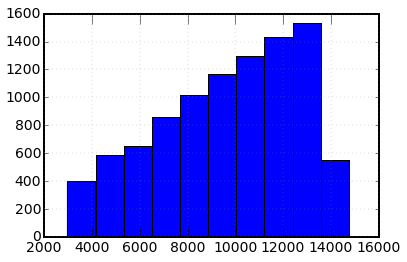

In [12]:
distance = np.linalg.norm(pmt_info['xyz'] - data['manip_pos'], axis = 1)
dsorted = distance.argsort()
plt.hist(distance[distance<18000])

/gs/software/CentOS-6/eb/software/Toolchain/iomkl/2015b/IPython/3.2.1-Python-2.7.10/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


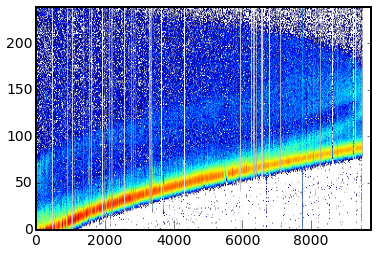

In [13]:
plt.imshow(np.log10(data['toa_map'][dsorted,:].T), aspect='auto', origin='lower')

In [60]:
# Lets do 3 distances
range_width = 3000.
max_dist = 16000.
dranges = [ [x*range_width, (x+1)*range_width] for x in range(1, int(np.ceil(max_dist/range_width)))]

In [61]:
dranges

[[3000.0, 6000.0],
 [6000.0, 9000.0],
 [9000.0, 12000.0],
 [12000.0, 15000.0],
 [15000.0, 18000.0]]

/gs/software/CentOS-6/eb/software/Toolchain/iomkl/2015b/IPython/3.2.1-Python-2.7.10/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10


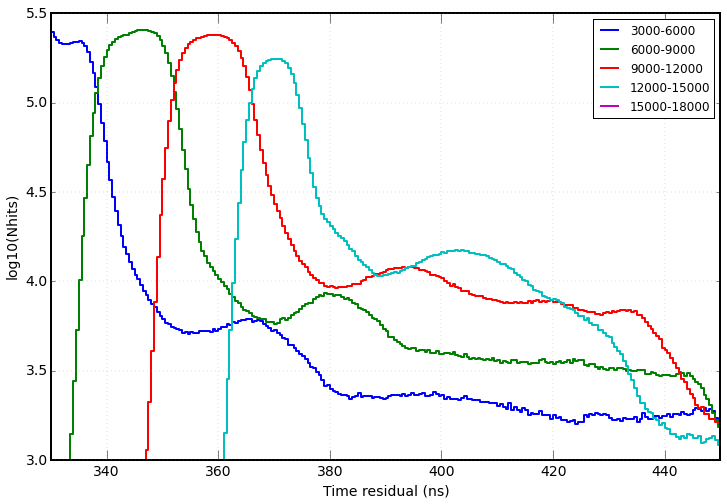

In [62]:
plt.figure(figsize=(12,8))
colors = ['b','g','r','c','m','y','sienna','olivedrab','navy','darkorange','teal']

for i, this_range in enumerate(dranges):
    rangebool = (distance>this_range[0])*(distance<this_range[1])
    jplot.unfilledBar(data['time_edges'], 
                      np.log10(data['toa_map'][rangebool,:].sum(axis=0)), 
                      label='-'.join(["%i" % x for x in this_range]),
                      color=colors[i])

plt.ylim([3., 5.5])
plt.legend(loc=0)
plt.xlabel('Time residual (ns)')
plt.ylabel('log10(Nhits)')

### Loading the MC with GreyDisc

In [63]:
gdisc_model = 'z4729_baseline'

gdisc_dir = '/home/jpyanez/snoplus/rundir/laserball_greydisc/' + gdisc_model
all_files = os.listdir(gdisc_dir)
file_list = [os.path.join(gdisc_dir,x) for x in all_files if  'pckl' in x]


In [64]:
for iFile in range(len(file_list)):
    try:
        tmp_data = pickle.load(open(file_list[iFile]))
    except:
        print file_list[iFile]
        continue
    if iFile == 0:
        gdisc = deepcopy(tmp_data)
    else:
        gdisc['toa_map']+= tmp_data['toa_map']

(array([  483.,   651.,   721.,   909.,  1018.,  1183.,  1263.,  1422.,
         1488.,   351.]),
 array([  3735.9027872 ,   4756.88403407,   5777.86528095,   6798.84652782,
          7819.8277747 ,   8840.80902157,   9861.79026845,  10882.77151532,
         11903.7527622 ,  12924.73400907,  13945.71525595]),
 <a list of 10 Patch objects>)

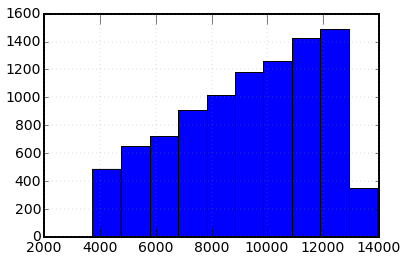

In [65]:
distance_mc = np.linalg.norm(pmt_info['xyz'] - gdisc['manip_pos'], axis = 1)
dsorted_mc = distance.argsort()
plt.hist(distance_mc[distance_mc<19000])

/gs/software/CentOS-6/eb/software/Toolchain/iomkl/2015b/IPython/3.2.1-Python-2.7.10/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


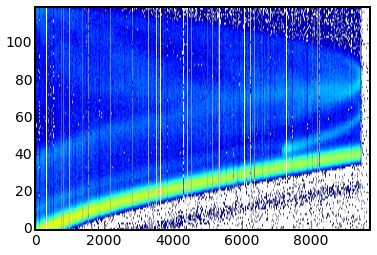

In [66]:
plt.imshow(np.log10(gdisc['toa_map'][dsorted_mc,:].T), aspect='auto', origin='lower')

/gs/software/CentOS-6/eb/software/Toolchain/iomkl/2015b/IPython/3.2.1-Python-2.7.10/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10


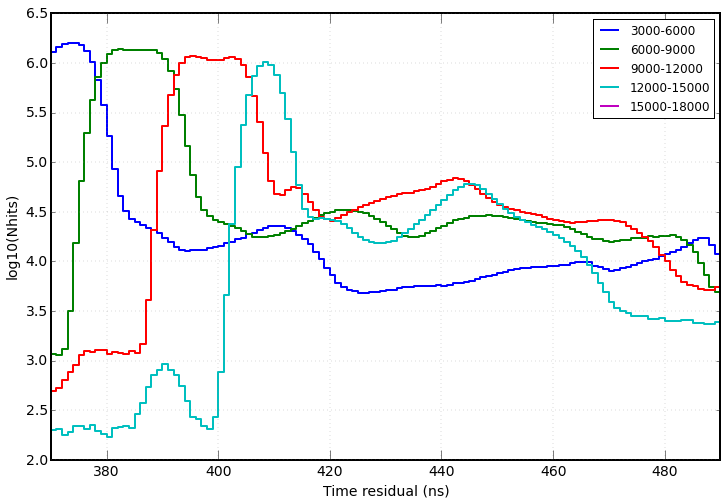

In [67]:
plt.figure(figsize=(12,8))
colors = ['b','g','r','c','m','y','sienna','olivedrab','navy','darkorange','teal']

for i, this_range in enumerate(dranges):
    rangebool = (distance_mc>this_range[0])*(distance_mc<this_range[1])
    jplot.unfilledBar(gdisc['time_edges'], 
                      np.log10(gdisc['toa_map'][rangebool,:].sum(axis=0)), 
                      label='-'.join(["%i" % x for x in this_range]),
                      color=colors[i])

#plt.ylim([3., 6.5])
plt.legend(loc=0)
plt.xlabel('Time residual (ns)')
plt.ylabel('log10(Nhits)')

### Comparing data and MC

43.0
35.0
35.5
37.5
40.0


/gs/software/CentOS-6/eb/software/Toolchain/iomkl/2015b/IPython/3.2.1-Python-2.7.10/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10
/gs/software/CentOS-6/eb/software/Toolchain/iomkl/2015b/IPython/3.2.1-Python-2.7.10/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10
/gs/software/CentOS-6/eb/software/Toolchain/iomkl/2015b/IPython/3.2.1-Python-2.7.10/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: RuntimeWarning: invalid value encountered in double_scalars


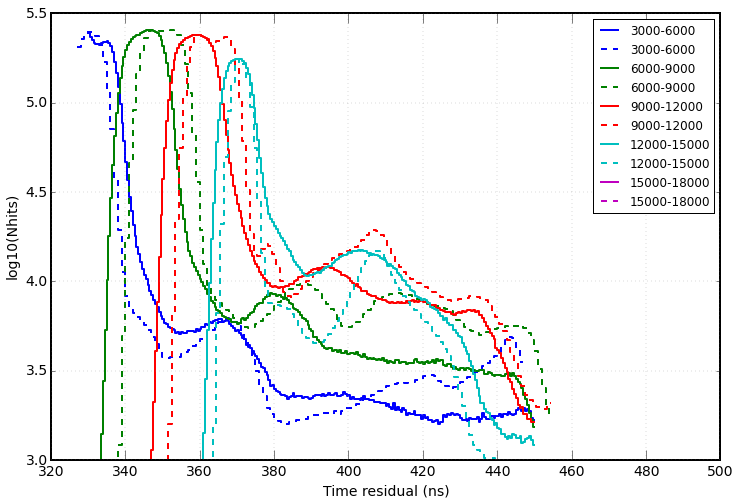

In [84]:
plt.figure(figsize=(12,8))
colors = ['b','g','r','c','m','y','sienna','olivedrab','navy','darkorange','teal']

for i, this_range in enumerate(dranges):
    rangebool = (distance>this_range[0])*(distance<this_range[1])
    rangeboolmc = (distance_mc>this_range[0])*(distance_mc<this_range[1])

    thisdata = np.log10(data['toa_map'][rangebool,:].sum(axis=0))
    thismc   = np.log10(gdisc['toa_map'][rangeboolmc,:].sum(axis=0))
    peak_pos
    mc_scale = thisdata.max()/thismc.max()
    
    peak_pos = gdisc['time_edges'][thismc.argmax()] - data['time_edges'][thisdata.argmax()]
    
    print peak_pos
    jplot.unfilledBar(data['time_edges'], 
                      thisdata, 
                      label='-'.join(["%i" % x for x in this_range]),
                      color=colors[i])

    jplot.unfilledBar(gdisc['time_edges']-peak_pos, 
                      mc_scale*thismc, 
                      label='-'.join(["%i" % x for x in this_range]),
                      color=colors[i], linestyle = '--')

plt.ylim([3., 5.5])
plt.xlim([320,500])
plt.legend(loc=0)
plt.xlabel('Time residual (ns)')
plt.ylabel('log10(Nhits)')

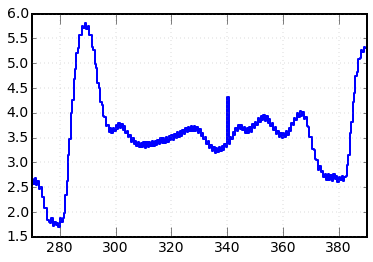

In [19]:
jplot.unfilledBar(pmt['time_edges'], np.log10(pmt['toa_map'].sum(axis=0))*scale2, 
                 color = 'blue', label = 'SNOplus current 3D PMT')